### Libraries

In [356]:
import pandas as pd
import re
import matplotlib.pyplot as plt
from tqdm import tqdm

In [318]:
import nltk 
import nltk.corpus

nltk.download('stopwords')
from nltk.corpus import stopwords

from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')

from wordcloud import WordCloud, STOPWORDS

from nltk.sentiment import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\kitsu\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\kitsu\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\kitsu\AppData\Roaming\nltk_data...


True

In [217]:
stop = stopwords.words('english')
lemmatizer = WordNetLemmatizer()

# 1- Cleaning 

### Reading

In [218]:
df = pd.read_csv('scp_20112021_export_4.csv', index_col=0)

In [219]:
df.head()

,SCP Number,SCP Text,Ratings,Discussions
0,2,"['Item #: SCP-002', 'Object Class: Euclid', 'S...",1642,127
1,3,"['Item #: SCP-003', 'Object Class: Euclid', 'S...",734,87
2,4,"['Item #: SCP-004', 'Object Class: Euclid', 'S...",1056,124
3,5,"['Item #: SCP-005', 'Object Class: Safe', 'Spe...",611,106
4,6,"['Item #: SCP-006', 'Object Class: Safe', ""Spe...",584,101


### Cleaning

In [332]:
def nlp_cleaner_class1(my_list):
    my_list = str(my_list)
    my_list = my_list.replace('\\n\\n',' ') #HTML leftovers
    my_list = re.sub(r"(@\[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)|^rt|http.+?", "", my_list)#HTML leftovers
    my_list = my_list.lower()
    my_list = " ".join([word for word in my_list.split() if word not in (stop)]) #removing stop words
    my_list = nltk.word_tokenize(my_list) #tokenization for order
    my_list = [lemmatizer.lemmatize(word) for word in my_list] #lemmzatizer to keep the roots
    return(my_list)

In [333]:
map_clean_text = map(nlp_cleaner_class1, df.loc[:,"SCP Text"])

In [334]:
list_clean_text = list(map_clean_text)

In [223]:
df['SCP Text Cleaned 1'] = list_clean_text

In [224]:
df.head()

,SCP Number,SCP Text,Ratings,Discussions,SCP Text Cleaned 1
0,2,"['Item #: SCP-002', 'Object Class: Euclid', 'S...",1642,127,"[item, scp002, object, class, euclid, special,..."
1,3,"['Item #: SCP-003', 'Object Class: Euclid', 'S...",734,87,"[item, scp003, object, class, euclid, special,..."
2,4,"['Item #: SCP-004', 'Object Class: Euclid', 'S...",1056,124,"[item, scp004, object, class, euclid, special,..."
3,5,"['Item #: SCP-005', 'Object Class: Safe', 'Spe...",611,106,"[item, scp005, object, class, safe, special, c..."
4,6,"['Item #: SCP-006', 'Object Class: Safe', ""Spe...",584,101,"[item, scp006, object, class, safe, special, c..."


### Exporting

In [210]:
df.to_csv('scp_cleaned_22112021_export_1.csv')

# 2- NLP

### Word Cloud

In [234]:
flat_clean = [item for sublist in df['SCP Text Cleaned 1'] for item in sublist]

In [291]:
merged_flat_clean = " ".join(flat_clean) 

In [298]:
stopwords = set(STOPWORDS)
# stopwords.update(["subject","containment procedure","special containment"]) # use to block some words if needed
wordcloud = WordCloud(max_words=25,background_color="white").generate(merged_flat_clean)

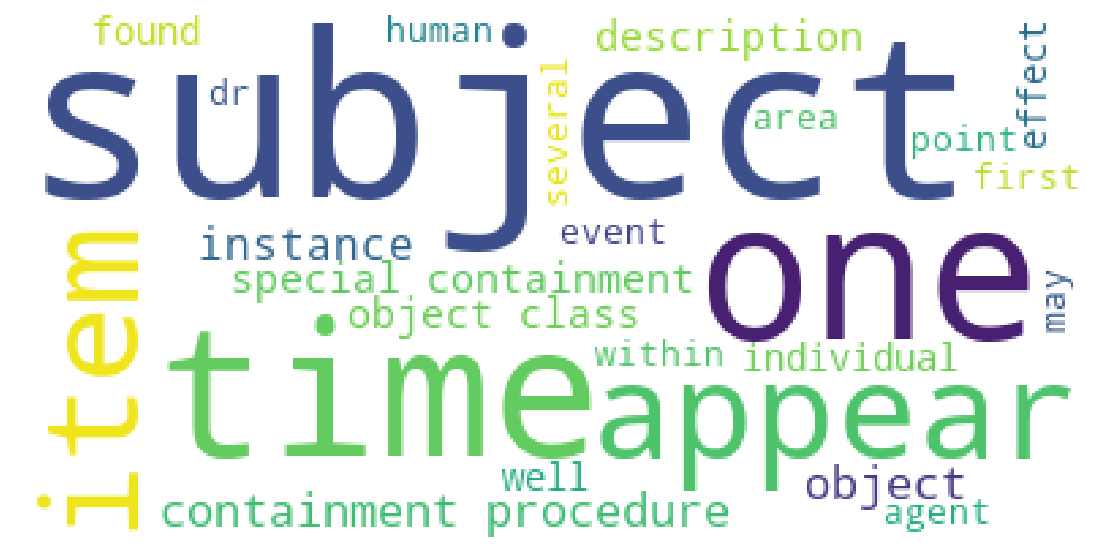

In [299]:
plt.figure(figsize=(20,10))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

### Basic NLP

In [301]:
fd = nltk.FreqDist(flat_clean)

In [306]:
fd.most_common(10)

[('subject', 13089),
 ('containment', 8742),
 ('dr', 8719),
 ('instance', 7682),
 ('time', 7135),
 ('object', 6843),
 ('one', 6829),
 ('personnel', 6400),
 ('foundation', 6264),
 ('within', 5446)]

In [313]:
print('Euclid: '+str(fd['euclid']))
print('Keter: '+str(fd['keter']))

Euclid: 1437
Keter: 476


### Sentiment Analysis 

In [363]:
def nlp_cleaner_class2(my_list):
    my_list = str(my_list)
    my_list = my_list.replace('\\n\\n',' ') #HTML leftovers
    my_list = re.sub(r"(@\[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)|^rt|http.+?", "", my_list)#HTML leftovers
    my_list = my_list.lower()
    return(my_list)

In [335]:
map_clean_text_sentiment = map(nlp_cleaner_class2, df.loc[:,"SCP Text"])

In [336]:
list_clean_text_sentiment = list(map_clean_text_sentiment)

In [341]:
scp_df_sentiment = pd.DataFrame(columns = ['SCP Number', 'SCP Text', 'Negative', 'Neutral', 'Positive'])

In [345]:
scp_df_sentiment.iloc[:,0] = df.iloc[:,0]
scp_df_sentiment.iloc[:,1] = list_clean_text_sentiment 

In [357]:
for i in tqdm(range(len(scp_df_sentiment))):
    score = sia.polarity_scores(scp_df_sentiment.iloc[i,1])
    scp_df_sentiment.iloc[i,2] = score['neg']
    scp_df_sentiment.iloc[i,3] = score['neu']
    scp_df_sentiment.iloc[i,4] = score['pos']

100%|██████████████████████████████████████████████████████████████████████████████| 2719/2719 [01:34<00:00, 28.68it/s]


In [358]:
scp_df_sentiment.head()

,SCP Number,SCP Text,Negative,Neutral,Positive
0,2,item scp002 object class euclid special conta...,0.053,0.891,0.057
1,3,item scp003 object class euclid special conta...,0.034,0.863,0.103
2,4,item scp004 object class euclid special conta...,0.044,0.918,0.038
3,5,item scp005 object class safe special contain...,0.059,0.824,0.117
4,6,item scp006 object class safe special contain...,0.077,0.828,0.094


##### Most SCP stories are neutral

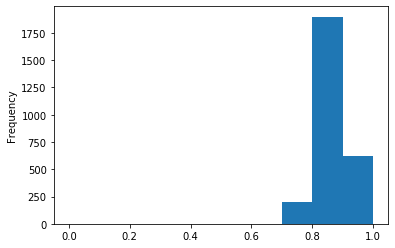

In [359]:
scp_df_sentiment['Neutral'].plot(kind='hist')

##### SCP 1758 is the most positive

In [360]:
scp_df_sentiment.sort_values('Positive', ascending=False)

,SCP Number,SCP Text,Negative,Neutral,Positive
1756,1758,item scp1758 object class safe special contai...,0.031,0.708,0.26
997,999,item scp999 object class safe special contain...,0.081,0.73,0.188
2717,2719,item scp2719 object class keter special conta...,0,0.816,0.184
2668,2670,item scp2670 object class euclid special cont...,0.041,0.791,0.167
1846,1848,item scp1848 object class euclid safe special...,0.074,0.759,0.167
...,...,...,...,...,...
595,597,adult content,0,1,0
2519,2521,,0,0,0
2605,2607,adult content,0,1,0
2180,2182,adult content,0,1,0


##### SCP 682 is the most negative

In [362]:
scp_df_sentiment.sort_values('Negative', ascending=False)

,SCP Number,SCP Text,Negative,Neutral,Positive
680,682,item scp682 object class keter special contai...,0.205,0.744,0.051
512,514,item scp514 object class euclid special conta...,0.198,0.744,0.059
46,48,item scp048 object class none see description...,0.196,0.746,0.059
910,912,item scp912 object class safe special contain...,0.189,0.774,0.038
1074,1076,item scp1076 object class euclid special cont...,0.181,0.774,0.045
...,...,...,...,...,...
693,695,adult content,0,1,0
1002,1004,adult content,0,1,0
2210,2212,,0,0,0
833,835,adult content,0,1,0
